# Assignment - Analyzing the IMDB Top 1000 Movies

In the next few assignments, you will be working with this data set of IMDB top 1000 movies. 

Source: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [1]:
import pandas as pd
import numpy as np 

In [2]:
# Read the data file "imdb_top_1000.csv" to a dataframe named "imdb"
imdb = pd.read_csv('../data/imdb_top_1000.csv', header=0)
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Describe the dataframe using the info() method.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
# List all the column names: 
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Part 1: Data Manipulation

In [5]:
# Display top 10 movies's title, released year and IMDB rating.
imdb.groupby(['Released_Year','Series_Title']).agg({'IMDB_Rating':'max'}).reset_index().sort_values('IMDB_Rating',ascending=False).head(10)

,Released_Year,Series_Title,IMDB_Rating
429,1994,The Shawshank Redemption,9.3
217,1972,The Godfather,9.2
718,2008,The Dark Knight,9.0
106,1957,12 Angry Men,9.0
234,1974,The Godfather: Part II,9.0
409,1993,Schindler's List,8.9
427,1994,Pulp Fiction,8.9
597,2003,The Lord of the Rings: The Return of the King,8.9
760,2010,Inception,8.8
423,1994,Forrest Gump,8.8


In [6]:
# Display moviess ranked 11-20. 
# Show their title, released year and IMDB rating.
(
    imdb
    .groupby(['Released_Year','Series_Title'])
    .agg({'IMDB_Rating':'max'})
    .reset_index()
    .sort_values('IMDB_Rating',ascending=False)
    .iloc[10:20]
)

,Released_Year,Series_Title,IMDB_Rating
174,1966,"Il buono, il brutto, il cattivo",8.8
499,1999,Fight Club,8.8
552,2001,The Lord of the Rings: The Fellowship of the Ring,8.8
509,1999,The Matrix,8.7
242,1975,One Flew Over the Cuckoo's Nest,8.7
279,1980,Star Wars: Episode V - The Empire Strikes Back,8.7
575,2002,The Lord of the Rings: The Two Towers,8.7
367,1990,Goodfellas,8.7
493,1998,Saving Private Ryan,8.6
383,1991,The Silence of the Lambs,8.6


In [7]:
# Select all movies directed by Quentin Tarantino.
# Show their title, released year, IMDB rating, and gross.
(
    imdb
    .loc[imdb.Director=='Quentin Tarantino']
    .groupby(['Released_Year','Series_Title'])
    .agg({'IMDB_Rating':'max'})
    .reset_index()
    .sort_values('IMDB_Rating',ascending=False)
    
)

,Released_Year,Series_Title,IMDB_Rating
1,1994,Pulp Fiction,8.9
5,2012,Django Unchained,8.4
0,1992,Reservoir Dogs,8.3
4,2009,Inglourious Basterds,8.3
2,2003,Kill Bill: Vol. 1,8.1
3,2004,Kill Bill: Vol. 2,8.0
6,2015,The Hateful Eight,7.8
7,2019,Once Upon a Time... in Hollywood,7.6


In [8]:
# Select all R rated movies with IMDB_Rating>=8.5
# Show their title, released year, certificate, and IMDB rating.
(
    imdb
    .loc[(imdb.Certificate=='R') & (imdb.IMDB_Rating>=8.5)]
    .groupby(['Series_Title','Released_Year','Certificate'])
    .agg({'IMDB_Rating':'max'})
    .reset_index()
)

,Series_Title,Released_Year,Certificate,IMDB_Rating
0,American History X,1998,R,8.5
1,Saving Private Ryan,1998,R,8.6
2,The Pianist,2002,R,8.5


In [9]:
# How many unique values are there in the column "Released_Year"? 
# Hint: nuniuqe()
imdb['Released_Year'].nunique()

100

In [10]:
# Count the number of movies in each "Released_Year"? 
# Hint: value_counts()
imdb['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2016    28
2013    28
        ..
1936     1
PG       1
1943     1
1930     1
1921     1
Name: Released_Year, Length: 100, dtype: int64

In [11]:
# In this dataset, there is a movie with an error in "Released_Year". 
# Hint: Released_Year should be a 4-digit integer but this movie's is not. 
# Find this movie. 
(
    imdb.groupby(['Series_Title'])['Released_Year']
    .max()
    .reset_index()
    .sort_values('Released_Year',ascending=False)
    .head(1)
)

,Series_Title,Released_Year
64,Apollo 13,PG


In [12]:
# Correct the values for the corresponding columns ("Release_Year" and "Certificate"). 
# You may want to look up this movie on www.imdb.com. 
# Hint: You can set value for a particular set by: df.loc[row_name, column_name] = new_value
imdb.loc[966,'Released_Year'] = '1995'
imdb.loc[966,'Certificate'] = 'PG'
imdb[imdb.Series_Title=='Apollo 13']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,1995,PG,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [13]:
# Change the data type of "Released_Year" to int
imdb['Released_Year'] = imdb['Released_Year'].apply(int)

In [14]:
# Select all movies released after (>=) 2010 and with IMDB_Rating>=8.5
# Show their title, released year, certificate, and IMDB rating.
(
    imdb[(imdb.Released_Year>=2010) & (imdb.IMDB_Rating>=8.5)]
    .filter(['Series_Title','Released_Year','Certificate','IMDB_Rating'])
)

,Series_Title,Released_Year,Certificate,IMDB_Rating
8,Inception,2010,UA,8.8
18,Hamilton,2020,PG-13,8.6
19,Gisaengchung,2019,A,8.6
20,Soorarai Pottru,2020,U,8.6
21,Interstellar,2014,UA,8.6
33,Joker,2019,A,8.5
34,Whiplash,2014,A,8.5
35,The Intouchables,2011,UA,8.5


In [15]:
# Select all movies whose genres contain 'Animation'
imdb_Ani = imdb.filter(['Series_Title','Genre'])
imdb_Ani['If_Ani'] = imdb_Ani['Genre'].str.contains('Animation',regex = False)
imdb_Ani[imdb_Ani.If_Ani==True]

,Series_Title,Genre,If_Ani
23,Sen to Chihiro no kamikakushi,"Animation, Adventure, Family",True
43,The Lion King,"Animation, Adventure, Drama",True
46,Hotaru no haka,"Animation, Drama, War",True
56,Kimi no na wa.,"Animation, Drama, Fantasy",True
58,Spider-Man: Into the Spider-Verse,"Animation, Action, Adventure",True
...,...,...,...
956,Mulan,"Animation, Adventure, Family",True
971,Omohide poro poro,"Animation, Drama, Romance",True
976,The Little Mermaid,"Animation, Family, Fantasy",True
986,Watership Down,"Animation, Adventure, Drama",True


In [16]:
# Create a new dataframe called "stars" including the following columns: 
# Series_Title, Released_Year, Star1, Star2, Star3, Star4
stars = imdb.filter(['Series_Title', 'Released_Year', 'Star1', 'Star2', 'Star3', 'Star4'])
stars

,Series_Title,Released_Year,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,1994,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,1972,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,2008,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,1974,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,1957,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen
996,Giant,1956,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker
997,From Here to Eternity,1953,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed
998,Lifeboat,1944,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix


In [17]:
# Create a new dataframe called "genres" including the following columns: 
# Series_Title, Released_Year, Genre.
genres = imdb.filter(['Series_Title','Released_Year', 'Genre'])
genres

,Series_Title,Released_Year,Genre
0,The Shawshank Redemption,1994,Drama
1,The Godfather,1972,"Crime, Drama"
2,The Dark Knight,2008,"Action, Crime, Drama"
3,The Godfather: Part II,1974,"Crime, Drama"
4,12 Angry Men,1957,"Crime, Drama"
...,...,...,...
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance"
996,Giant,1956,"Drama, Western"
997,From Here to Eternity,1953,"Drama, Romance, War"
998,Lifeboat,1944,"Drama, War"


In [18]:
# Sorting:
# Sort dataframe genres in ascending order of "Released_Year"
(
    genres.sort_values('Released_Year',ascending=True)
)

,Series_Title,Released_Year,Genre
321,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery"
127,The Kid,1921,"Comedy, Drama, Family"
568,Nosferatu,1922,"Fantasy, Horror"
194,Sherlock Jr.,1924,"Action, Comedy, Romance"
193,The Gold Rush,1925,"Adventure, Comedy, Drama"
...,...,...,...
20,Soorarai Pottru,2020,Drama
205,Soul,2020,"Animation, Adventure, Comedy"
613,Druk,2020,"Comedy, Drama"
464,Dil Bechara,2020,"Comedy, Drama, Romance"


In [19]:
# Select all movies released after (>=) 2010 and with IMDB_Rating>=8.5
# Show their title, released year, Certificate, and gross.
# Sort them in descending order of "Gross"
(
    imdb[(imdb.Released_Year>=2010) & (imdb.IMDB_Rating>=8.5)]
    .filter(['Series_Title','Released_Year','Certificate','Gross'])
    .sort_values('Gross', ascending=False)
    
)

,Series_Title,Released_Year,Certificate,Gross
19,Gisaengchung,2019,A,"53,367,844"
33,Joker,2019,A,"335,451,311"
8,Inception,2010,UA,"292,576,195"
21,Interstellar,2014,UA,"188,020,017"
35,The Intouchables,2011,UA,"13,182,281"
34,Whiplash,2014,A,"13,092,000"
18,Hamilton,2020,PG-13,NaN
20,Soorarai Pottru,2020,U,NaN


In [20]:
# Does the sorting result looks right to you? What's the problem? 
imdb.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [21]:
# Resolve this problem of "Gross" and convert its data type to float
# Hint: You may find this webpage useful: 
# https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe
imdb['Gross'] = imdb['Gross'].str.replace(',','')
imdb['Gross'] = imdb['Gross'].apply(float)
imdb

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [22]:
# Next, redo the sorting on Gross

# Select all movies released after (>=) 2010 and with IMDB_Rating>=8.5
# Show their title, released year, Certificate, and gross.
# Sort them in descending order of "Gross"
(
    imdb[(imdb.Released_Year>=2010) & (imdb.IMDB_Rating>=8.5)]
    .filter(['Series_Title','Released_Year','Certificate','Gross'])
    .sort_values('Gross', ascending=False)
    
)

,Series_Title,Released_Year,Certificate,Gross
33,Joker,2019,A,335451311.0
8,Inception,2010,UA,292576195.0
21,Interstellar,2014,UA,188020017.0
19,Gisaengchung,2019,A,53367844.0
35,The Intouchables,2011,UA,13182281.0
34,Whiplash,2014,A,13092000.0
18,Hamilton,2020,PG-13,NaN
20,Soorarai Pottru,2020,U,NaN


In [23]:
# Add a new column "Runtime_min" by removing the substring ' min" in "Runtime"
# Set its data type as int
# Hint: https://stackoverflow.com/questions/36505847/substring-of-an-entire-column-in-pandas-dataframe
imdb['Runtime_min'] = imdb['Runtime'].str[:0-3]
imdb['Runtime_min'] = imdb['Runtime_min'].apply(int)

In [24]:
# Add a new column "Age_Year" by expression: 2021 - Released_Year
imdb['Age_Year'] = 2021 - imdb['Released_Year']
imdb.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min,Age_Year
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,27


In [25]:
# Add a new column "Decade" with values as 1980, 1990, 2000, 2010, 2020, etc. 
imdb['Decade'] = imdb['Released_Year']//10 *10
imdb['Decade']

0      1990
1      1970
2      2000
3      1970
4      1950
       ... 
995    1960
996    1950
997    1950
998    1940
999    1930
Name: Decade, Length: 1000, dtype: int64

## Part 2: Data Summarization

In [26]:
# Total "Gross" of all top 1000 movies


In [27]:
# Average "No_of_Votes" of all movies


In [28]:
# Count movies in each decade (e.g., ..., 1980, 1990, 2000, 2010, 2020)
# Sort decades by the number of movies in descending order


In [29]:
# Count movies by different directors.
# Show the top 10 directors with the most movies in this list


In [30]:
# For each director, calculate the number of movies, average IMDB_Rating, and total gross. 
# Ranked in descending order of total gross
# Show the top 10 directors with the most gross


In [31]:
# Group movies by decade and director 
# In each group (i.e., for each decade and each director), 
# calculate the number of movies and average IMDB rating.
# Sort in descending order of movie count


In [32]:
# Bonus Question 1: 
# Find the top 3 highest rated movie of each year since 2010. 
# Show their released year, ranking, title, and IMDB_Rating.
# Sort them in descending order of year and ascending order of ranking


In [33]:
# Bonus Question 2: 
# Find all directors whose movies appeared in at least five different decades. 
# Your result should include: director, decade, and the number of movies in the decade.


## Part 3. Data Visualization

You need to complete all data processing/manipulation steps above before visualization. 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn') 
import seaborn as sns

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Meta_score'>

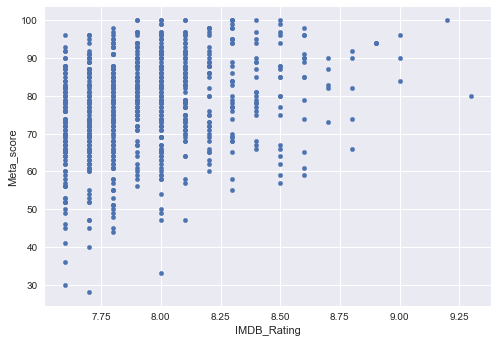

In [35]:
# Create a scatterplot to show the two scores "IMDB_Rating" and "Meta_score"
# What can you tell about this pair of scores? 
imdb.plot.scatter(x='IMDB_Rating', y='Meta_score')
#The higher the meta score the higher the IMDB rating

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Meta_score'>

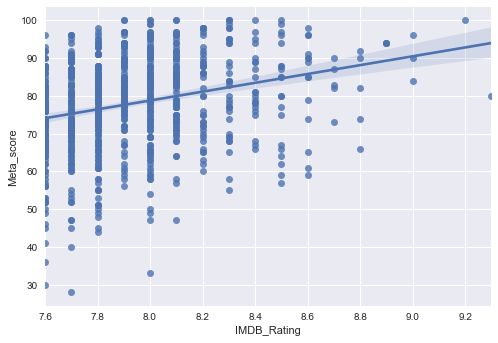

In [36]:
# Fit a trendline to show the relationship between the two scores
# Hint: sns.regplot()
# Try different order for the trendline
sns.regplot(data=imdb, x='IMDB_Rating', y='Meta_score', order=1)

In [37]:
# Do any of the data points in the scatterplot surprise you? 
# Try to identify a couple of such movies. 
imdb[(imdb.Meta_score==80)&(imdb.IMDB_Rating>=9.2)]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min,Age_Year,Decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,27,1990


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Meta_score'>

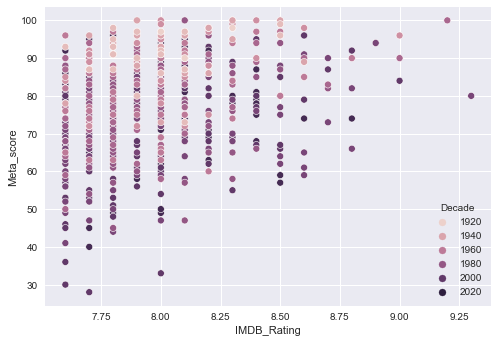

In [38]:
# In the scatterplot, use color to differentiate movies from different decade. 
g = sns.scatterplot(data=imdb, x='IMDB_Rating',y='Meta_score',hue='Decade')
g

<AxesSubplot:>

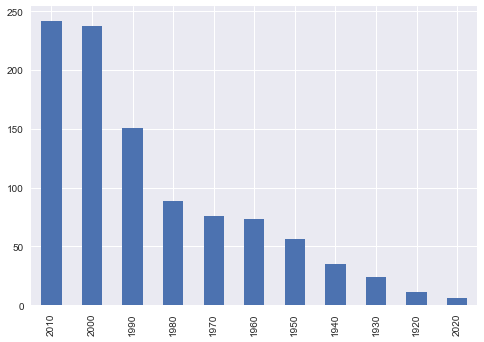

In [39]:
# Create a chart to show the number of movies in each decade
imdb.Decade.value_counts().plot(kind='bar')


<AxesSubplot:xlabel='Decade', ylabel='Probability'>

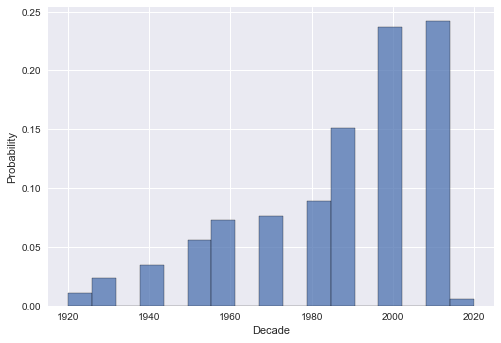

In [40]:
# Create a chart to show the percentage of movies in each decade
sns.histplot(data=imdb, x='Decade', stat='probability')


<AxesSubplot:xlabel='Director'>

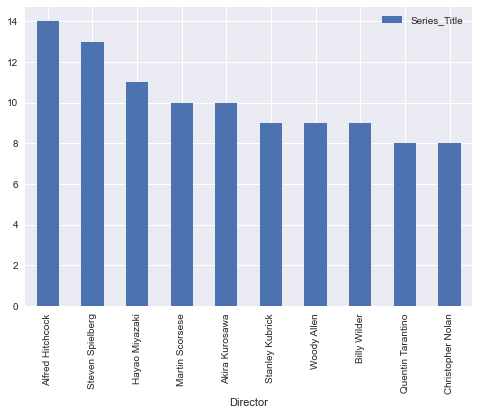

In [49]:
# Count movies by different director.
# Show the top 10 directors with the most movies in a bar chart. 
g= (
    imdb.groupby(['Director'])
    .agg({'Series_Title': 'count'})
    .sort_values('Series_Title', ascending=False)
    .head(10)
)
g.plot(kind='bar')


In [42]:
imdb.head(4)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min,Age_Year,Decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,27,1990
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,175,49,1970
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,152,13,2000
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,202,47,1970


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

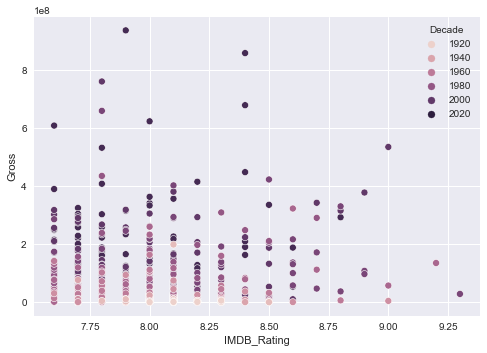

In [43]:
# Create a scatterplot of "IMDB_Rating" and "Gross" 
# Use color to differentiate movies from different decades
# What can you tell from the chart? 
sns.scatterplot(data=imdb, x='IMDB_Rating', y='Gross',hue='Decade')
#the later in the decade the more money it made

<AxesSubplot:ylabel='Drama'>

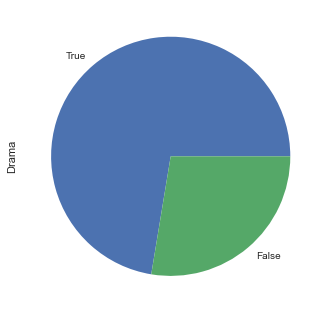

In [44]:
# Create a column (variable) called "Drama" to indicate if a movie's genres contain "Drama"
# Create a pie chart to show the composition
imdb['Drama'] = imdb['Genre'].str.contains('Drama',regex=False)
imdb['Drama'].value_counts().plot(kind='pie')

In [45]:
imdb.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min,Age_Year,Decade,Drama
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,27,1990,True


<AxesSubplot:xlabel='Decade', ylabel='Gross'>

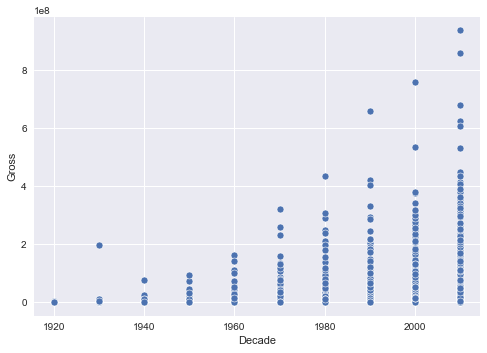

In [46]:
# Create a plot to compare the gross of movies across decades
sns.scatterplot(data=imdb, x='Decade',y='Gross')

<AxesSubplot:xlabel='Gross', ylabel='Count'>

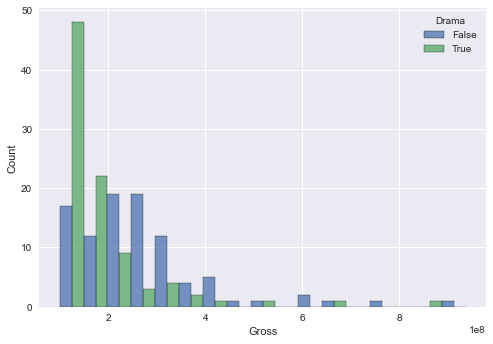

In [55]:
# For movies that gross over $100 million dollors 
# Create a histogram of gross for drama vs. non-drama movies
b =imdb[imdb.Gross>=100000000]
sns.histplot(data=b, x='Gross',hue='Drama',multiple='dodge')